# 비지도학습 PBT - 구매 패턴 기반 고객 군집분석과 페르소나 도출

## 미션 1. 이 고객 데이터는 정말 하나의 집단일까?

In [1]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
from hossam import load_data
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False


c:\Users\wodyd\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


📦 아이티윌 이광호 강사가 제작한 라이브러리를 사용중입니다.
📚 자세한 사용 방법은 https://py.hossam.kr 을 참고하세요.
📧 Email: leekh4232@gmail.com
🎬 Youtube: https://www.youtube.com/@hossam-codingclub
📝 Blog: https://blog.hossam.kr/
🔖 Version: 0.4.18

✅ 시각화를 위한 한글 글꼴(NotoSansKR-Regular)이 자동 적용되었습니다.


In [2]:
origin = load_data('wholesale_customers')
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
print(origin.info())
origin.head()
df = origin.drop(['Channel','Region'], axis = 1)
df

이 데이터 세트는 도매 유통업체의 고객 정보를 담고 있습니다. 다양한 제품 카테고리에 대한 연간 지출액(mu, 화폐 단위)을 포함합니다. (출처: https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

컬럼명            의미                  설명
----------------  --------------------  --------------------------------------------------------------------------------------------
Channel           유통 채널             고객의 거래 채널을 나타냄. 주로 Horeca(호텔·레스토랑·카페) 또는 Retail(소매점) 구분에 사용됨
Region            지역                  고객이 속한 지리적 지역 구분 변수. 특정 국가 내의 권역 정보
Fresh             신선식품 구매액       육류, 채소, 과일 등 신선식품 카테고리에 대한 연간 구매 금액
Milk              유제품 구매액         우유, 치즈, 요거트 등 유제품 카테고리에 대한 연간 구매 금액
Grocery           식료품 구매액         가공식품, 일반 식료품 등 장기 보관 식품 카테고리 구매 금액
Frozen            냉동식품 구매액       냉동 육류, 냉동 가공식품 등 냉동식품 카테고리 구매 금액
Detergents_Paper  세제·종이류 구매액    세제, 화장지, 키친타월 등 생활 소모품 구매 금액
Delicassen        즉석·가공식품 구매액  즉석식품, 델리 식품, 가공 반찬류 등의 구매 금액

데이터셋 크기: (440, 8)
열 개수: 8
행 개수: 440
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Da

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


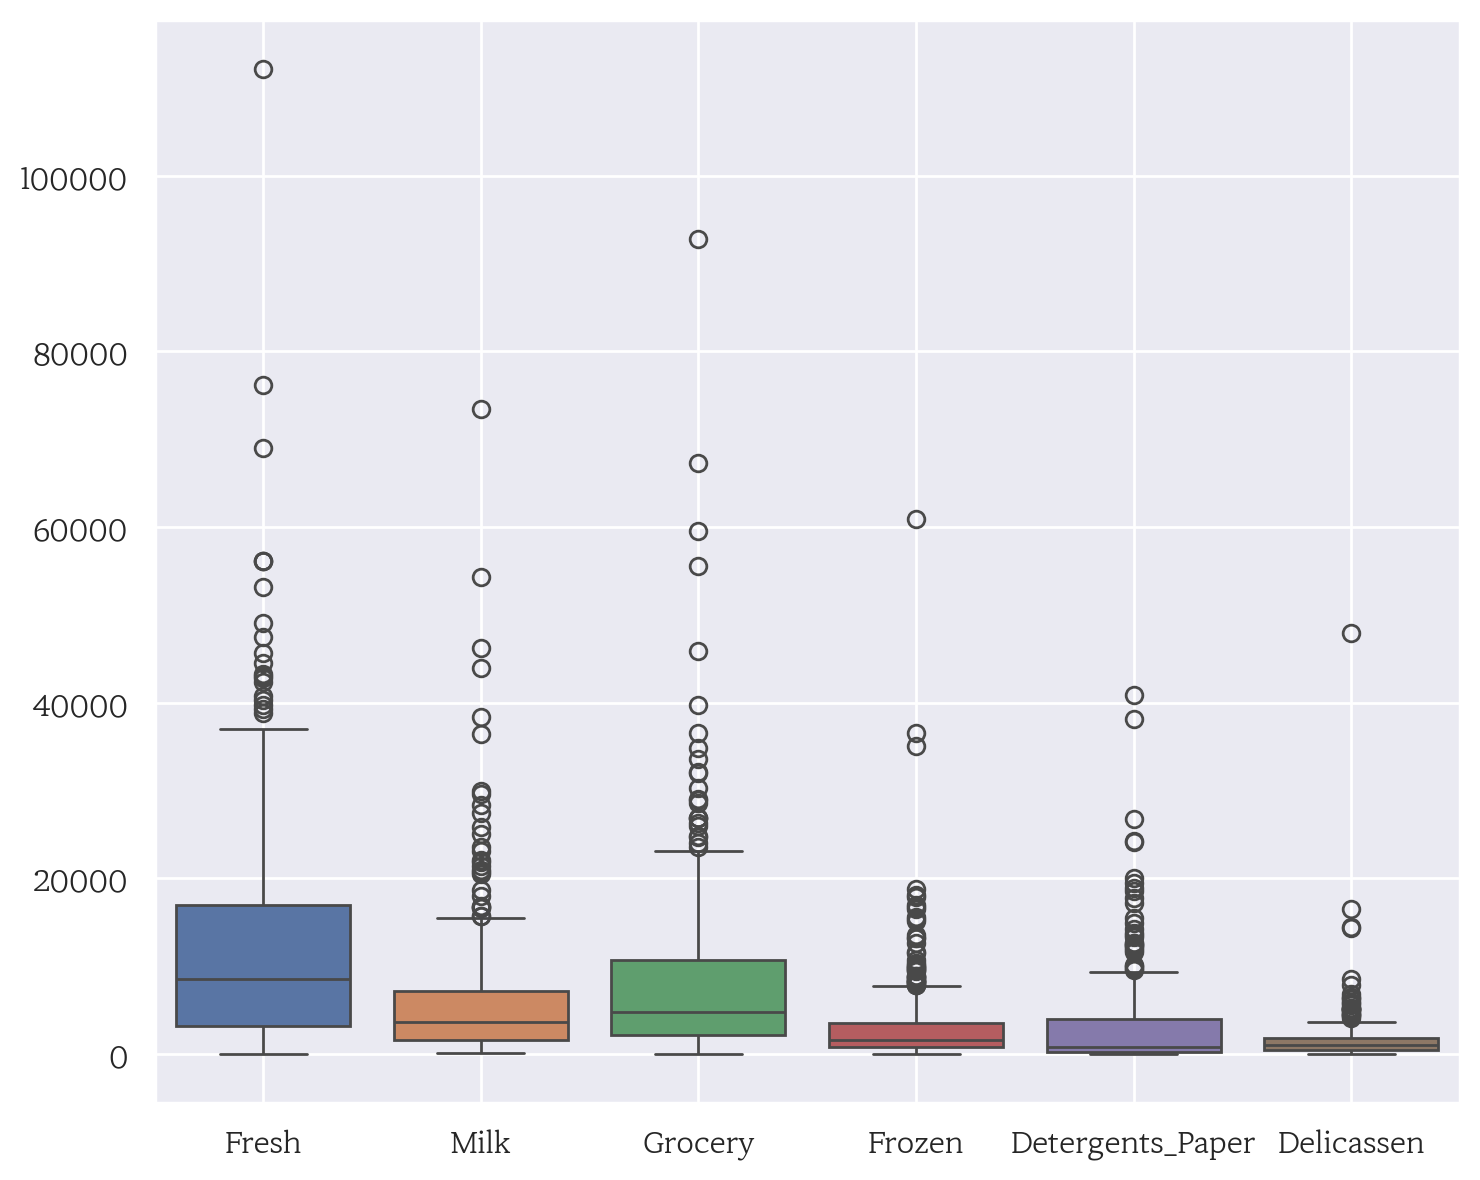

In [3]:
width_px = 1500
height_px = 1200
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.boxplot(data=df, orient = 'v')

# 그래프 꾸미기
ax.grid(True) # 배경 격자 표시/숨김

# 출력
plt.tight_layout()
plt.show()
plt.close()

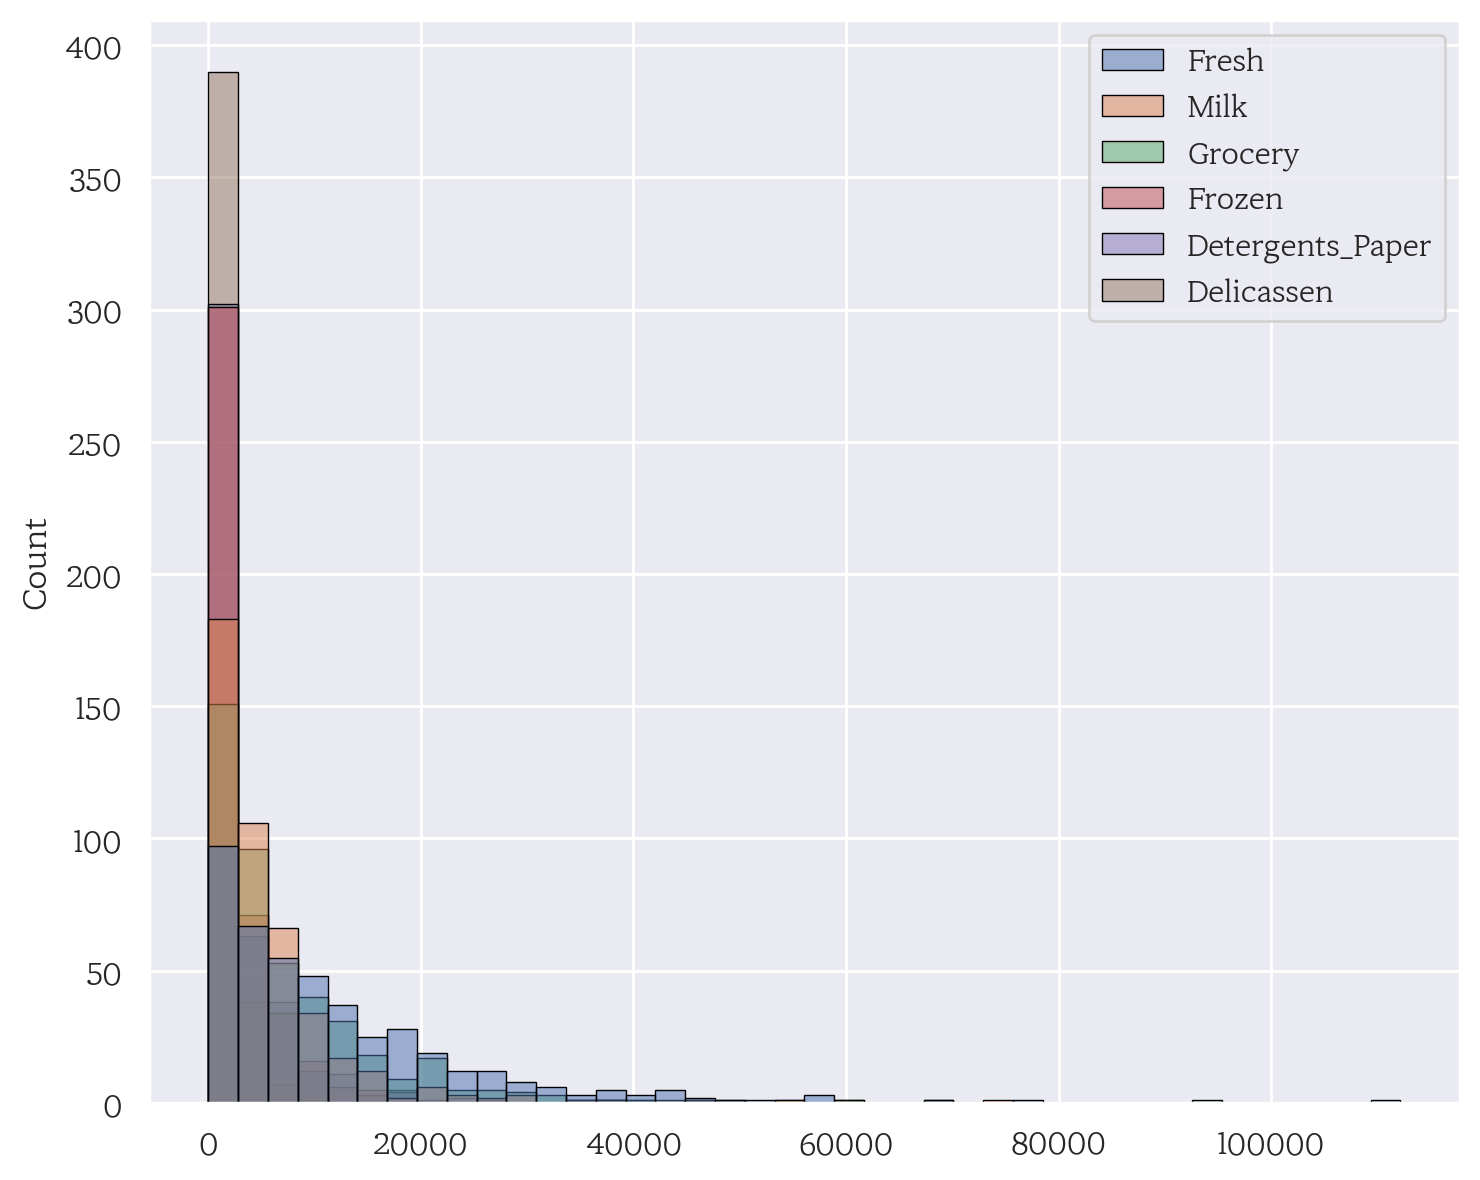

In [4]:
width_px = 1500
height_px = 1200
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# histogram 그리기
sb.histplot(data = df, bins = 40, 
            edgecolor ='#000000', linewidth = 0.5)
# 그래프 꾸미기
ax.grid(True) # 배경 격자 표시/숨김

# 출력
plt.tight_layout()
plt.show()
plt.close()

In [5]:
df2 = df.copy()
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicassen']
df2[cols].corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [6]:
df2.skew()

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [22]:
import numpy as np
df2 = np.log1p(df2)
df2.skew()

Fresh              -3.184990
Milk               -0.674085
Grocery            -2.820383
Frozen             -0.927882
Detergents_Paper   -1.113744
Delicassen         -2.478029
dtype: float64

In [23]:
print(df2.columns.tolist())

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


### 3. 이 고객들은 어떤 축에서 갈라질까? (PCA)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

# 주성분 분석 패키지
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

from pandas import DataFrame

scaler = StandardScaler()
sdf = DataFrame(scaler.fit_transform(df2), columns = df2.columns)
sdf.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.486184,0.976299,0.440155,-1.509250,0.644143,0.408966
1,0.087889,0.990956,0.652171,0.134052,0.766043,0.627926
2,0.016356,0.891151,0.454687,0.376899,0.804405,1.776833
3,0.517477,-0.957973,-0.084792,1.141574,-0.328712,0.633133
4,0.880631,0.439662,0.395847,0.757322,0.404939,1.456588


In [9]:
# 차원 축소 실행
estimator = PCA(n_components = 'mle', random_state = 52)
pca = estimator.fit_transform(sdf)
pca

array([[ 1.38038279, -0.30472683, -0.2410617 , -1.41571932,  0.33169665],
       [ 1.43886964,  0.53746823,  0.0842323 ,  0.03092821,  0.11086861],
       [ 1.51345256,  1.23256453,  0.98530594, -0.16852208, -0.15548066],
       ...,
       [ 2.85257677,  0.19460002, -0.52435731, -0.88014849, -0.15683638],
       [-1.01176679,  0.45278455,  0.66045788, -0.8298864 ,  0.18498776],
       [-0.91564089, -2.91826108, -0.9249211 , -1.0532505 ,  0.3053887 ]],
      shape=(440, 5))

In [11]:
# 차원 축소 결과를 DF로 구성
# 일반적으로 PC1~PCn

n = pca.shape[1]
cols = [f'PC{i+1}' for i in range(n)]

pca_df = DataFrame(pca, columns = cols)
pca_df

,PC1,PC2,PC3,PC4,PC5
0,1.380383,-0.304727,-0.241062,-1.415719,0.331697
1,1.438870,0.537468,0.084232,0.030928,0.110869
2,1.513453,1.232565,0.985306,-0.168522,-0.155481
3,-0.825105,1.210790,0.252141,0.339294,-0.714398
4,0.802897,1.766046,0.312698,-0.234905,-0.260565
...,...,...,...,...,...
435,0.592201,2.271130,-0.191661,0.662708,1.083723
436,-2.153224,1.697280,0.328497,-0.524744,0.126910
437,2.852577,0.194600,-0.524357,-0.880148,-0.156836
438,-1.011767,0.452785,0.660458,-0.829886,0.184988


In [12]:
estimator.explained_variance_ratio_

array([0.44077752, 0.27194917, 0.10698428, 0.10103287, 0.04876269])

In [13]:
estimator.explained_variance_ratio_.cumsum()

array([0.44077752, 0.71272669, 0.81971097, 0.92074384, 0.96950653])

In [14]:
estimator = PCA(n_components = 0.8, random_state = 52)
pca = estimator.fit_transform(sdf)

n = pca.shape[1]

cols = [f'PC{i+1}' for i in range(n)]

pca_df = DataFrame(pca, columns = cols)
pca_df

,PC1,PC2,PC3
0,1.380383,-0.304727,-0.241062
1,1.438870,0.537468,0.084232
2,1.513453,1.232565,0.985306
3,-0.825105,1.210790,0.252141
4,0.802897,1.766046,0.312698
...,...,...,...
435,0.592201,2.271130,-0.191661
436,-2.153224,1.697280,0.328497
437,2.852577,0.194600,-0.524357
438,-1.011767,0.452785,0.660458


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24980\2360643387.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(


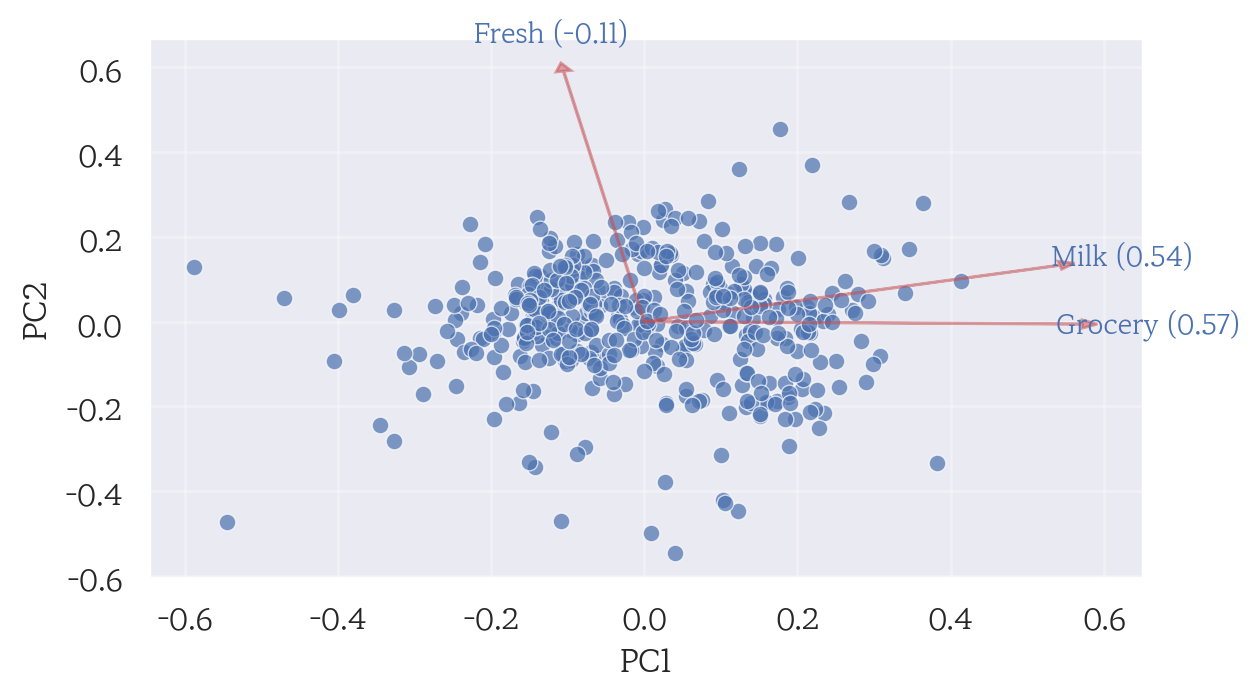

In [24]:
xname = 'PC1'
yname = 'PC2'

# 필요한 정보 추출
score = estimator.transform(sdf)
components = estimator.components_

x_index = pca_df.columns.get_loc(xname)
y_index = pca_df.columns.get_loc(yname)

xs = score[:, x_index]
ys = score[:, y_index]
n_features = score.shape[1]

scalex = 1.0 / (xs.max() - xs.min())
scaley = 1.0 / (ys.max() - ys.min())

# 시각화
figsize = (1280 / my_dpi, 720 / my_dpi)
fig, ax = plt.subplots(1, 1, figsize = figsize, dpi = my_dpi)

sb.scatterplot(
    x = xs * scalex, y = ys * scaley, palette = 'Set1', ax=ax, alpha = 0.7
)

for i in range(n_features):
    ax.arrow(
        0,
        0,
        components[x_index, i],
        components[y_index, i],
        color = 'r',
        alpha = 0.5,
        head_width = 0.02,
        head_length = 0.02
    )
    ax.text(
        components[x_index, i] * 1.15,
        components[y_index, i] * 1.15,
        f'{df.columns[i]} ({components [x_index, i]:.2f})',
        color = 'b',
        ha = 'center',
        va = 'center'
    )

ax.grid(True, alpha = 0.3)
ax.set_xlabel(xname)
ax.set_ylabel(yname)

plt.tight_layout()
plt.show()
plt.close()